# SUPPORT VECTOR MACHINES

In [17]:
import sklearn                # machine learning library
from sklearn import datasets  # sklearn has multiple datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import cross_validate # need to upload this before KNN
from sklearn.neighbors import KNeighborsClassifier # upload this at same time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate # need to upload this before KNN
from sklearn.neighbors import KNeighborsClassifier # upload this at same time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
wine = sklearn.datasets.load_wine() 
X = wine.data
y = wine.target
df2 = pd.DataFrame(X, columns=wine.feature_names)

In [6]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
#plot_classifier(X, y, svm, lims=(11,15,0,6))


# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
#plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

Number of original examples 178
Number of support vectors 22


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

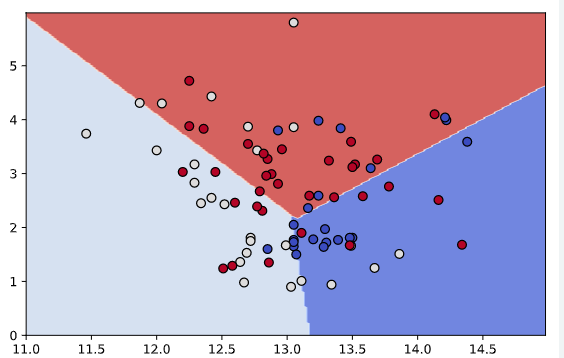

# Kernel SVM's

In [9]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.0001}


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [13]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.7458874458874458
Test accuracy of best grid search hypers: 0.7916666666666666


 Logistic regression and svm are linear classifiers,
 Logistic regression with kernels can be slow but svm fast
 output of probabilities in logistic can be meaninful svm not so much
 both can be extended to multiclass classification
 
 svm typically uses hinge loss and L2 regularaizatin

# Stocastic Gradient Descent Classifier 
can handel very large datasets
only the loss changes 
bigger alpha means bigger regularaization inverse of C

In [18]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}
Best CV accuracy 0.6509090909090909
Test accuracy of best grid search hypers: 0.6805555555555556
